In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Group Exploratory Assignment

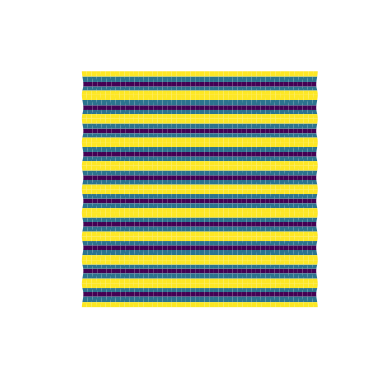

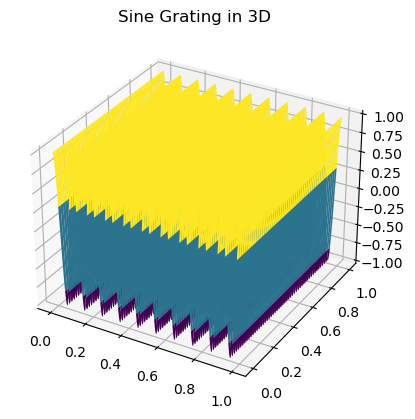

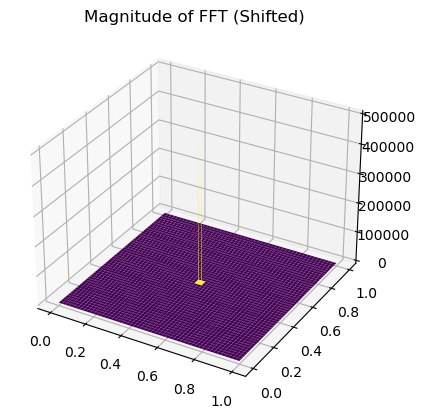

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define parameters
frequency = 10
phase = 90  # in degrees
amplitude = 1

# Create the meshgrid
X, Y = np.meshgrid(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001))

# Convert phase to radians
phase_rad = np.deg2rad(phase)

# Compute sine grating
Z = amplitude * np.sin((2 * np.pi * frequency * X) + phase_rad)

# Plot the sine grating using a 2D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.viridis)  # Choose 'gray' if grayscale is needed

# Make the view from above, with shading and square axis
ax.view_init(elev=90, azim=0)  # Equivalent to view(0,90) in MATLAB
plt.axis('off')  # Turn off axis
ax.set_box_aspect([1, 1, 0.1])  # Make the aspect ratio square
plt.show()

# Optional: Save the image
# plt.savefig('sine_grate_image.jpg', bbox_inches='tight')

# Fourier transform of the sine grating
Z_fft = np.fft.fft2(Z)
Z_fft_shifted = np.fft.fftshift(Z_fft)

# Plot the original sine grating in 3D
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=cm.viridis)
plt.title("Sine Grating in 3D")
plt.show()

# Plot the magnitude of the Fourier transform in 3D
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_surface(X, Y, np.abs(Z_fft_shifted), cmap=cm.viridis)
plt.title("Magnitude of FFT (Shifted)")
plt.show()


/tmp/ipykernel_18960/3379372551.py:34: RuntimeWarning: divide by zero encountered in log
  ax_fft.imshow(np.log(np.abs(Z_fft_shifted)), extent=(0, 1, 0, 1), cmap='gray')


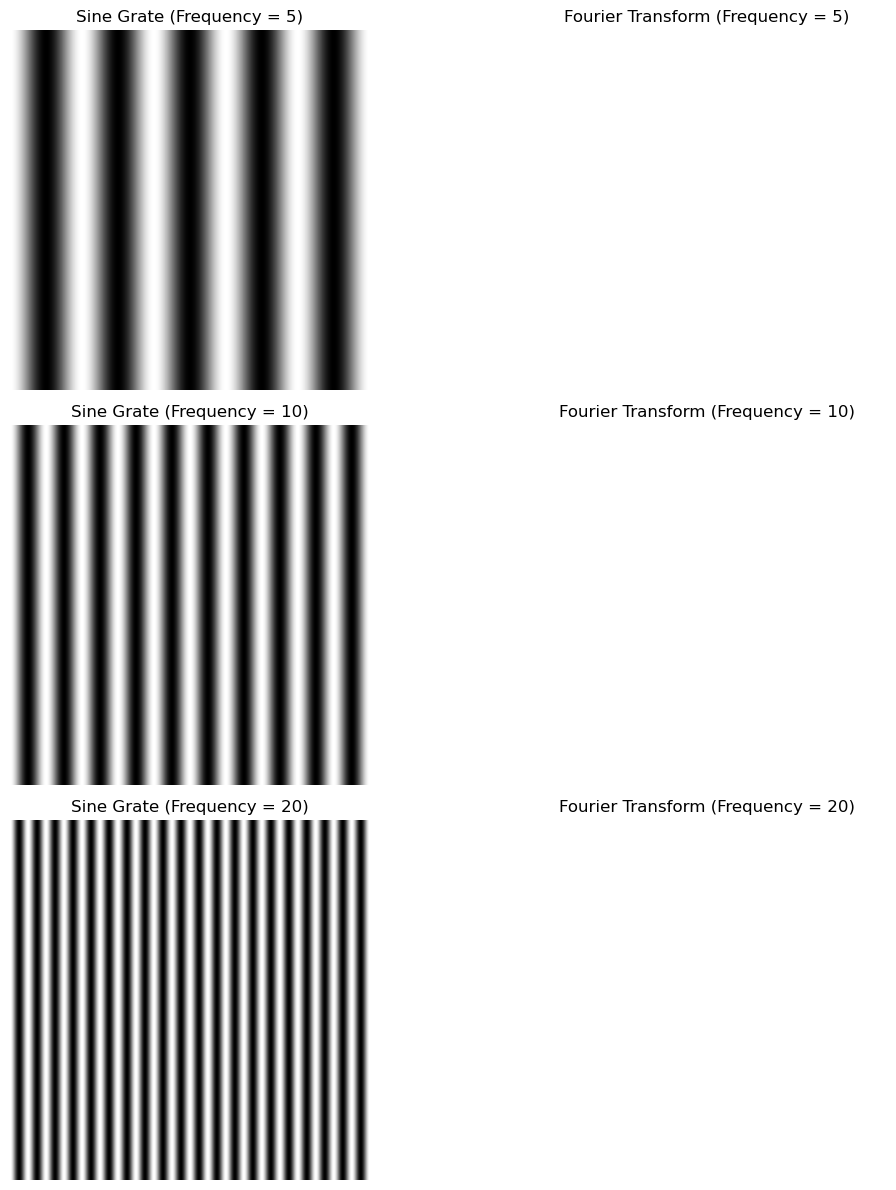

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift

# Parameters
amplitude = 1
phase = np.deg2rad(90)  # Convert phase to radians
frequencies = [5, 10, 20]  # 3 different frequencies

# Create meshgrid
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)

# Plot images for different frequencies
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, freq in enumerate(frequencies):
    # Create the sine wave
    Z = amplitude * np.sin(2 * np.pi * freq * X + phase)

    # Plot the sine grate image
    ax = axes[i, 0]
    ax.imshow(Z, extent=(0, 1, 0, 1), cmap='gray')
    ax.set_title(f'Sine Grate (Frequency = {freq})')
    ax.axis('off')

    # Compute Fourier Transform
    Z_fft = fft2(Z)
    Z_fft_shifted = fftshift(Z_fft)
    
    # Plot the magnitude of the Fourier Transform
    ax_fft = axes[i, 1]
    ax_fft.imshow(np.log(np.abs(Z_fft_shifted)), extent=(0, 1, 0, 1), cmap='gray')
    ax_fft.set_title(f'Fourier Transform (Frequency = {freq})')
    ax_fft.axis('off')

plt.tight_layout()
plt.show()